In [25]:
import pandas as pd
import numpy as np
import string
import json
import os
import matplotlib.pyplot as plt


In [26]:
path = "E:\PBL6\data"
os.chdir(path)
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


### dữ liệu sách tiếng Việt

In [27]:
file_path_vn = 'vn_books_tiki.csv'
vn_data_book = pd.read_csv(file_path_vn)
vn_data_book.drop(vn_data_book.columns[0], axis=1, inplace=True)
vn_data_book['language'] = 2 #tiếng việt = 2

vn_data_book.head()

,id,name,price,original_price,discount,discount_rate,rating_average,review_count,thumbnail_url,quantity_sold,categories,description,authors,publisher,publication_date,manufacturer,book_cover,number_of_page,language
0,74021317,Cây Cam Ngọt Của Tôi,64800,108000,43200,40,5.0,13236,https://salt.tikicdn.com/cache/280x280/ts/prod...,71894,"['Nhà Sách Tiki', 'Sách tiếng Việt', 'Sách văn...",“Vị chua chát của cái nghèo hòa trộn với vị ng...,José Mauro de Vasconcelos,Nhã Nam,NaN,Nhà Xuất Bản Hội Nhà Văn,Bìa mềm,244,2
1,188940817,Vị Thần Của Những Quyết Định,54510,79000,24490,31,4.8,1148,https://salt.tikicdn.com/cache/280x280/ts/prod...,9750,"['Nhà Sách Tiki', 'Sách tiếng Việt', 'Sách Kiế...",Không có gì là ngẫu nhiên. Mọi chuyện đều là t...,Universe,Người Trẻ Việt,2022-07-01 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,320,2
2,189643105,Không Phải Sói Nhưng Cũng Đừng Là Cừu -Tặng kè...,81925,128000,46075,36,4.8,1404,https://salt.tikicdn.com/cache/280x280/ts/prod...,12786,"['Nhà Sách Tiki', 'Sách tiếng Việt', 'Sách kỹ ...",SÓI VÀ CỪU - BẠN KHÔNG TỐT NHƯ BẠN NGHĨ ĐÂU! \...,Lê Bảo Ngọc,Skybooks,2022-07-07 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,296,2
3,26114399,"Nóng Giận Là Bản Năng , Tĩnh Lặng Là Bản Lĩnh",53584,89000,35416,40,4.8,7173,https://salt.tikicdn.com/cache/280x280/ts/prod...,73876,"['Nhà Sách Tiki', 'Sách tiếng Việt', 'Sách kỹ ...",Sai lầm lớn nhất của chúng ta là đem những tật...,Tống Mặc,Skybooks,2019-01-08 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,264,2
4,109017985,"Thiên Tài Bên Trái, Kẻ Điên Bên Phải (Tái Bản)",114560,179000,64440,36,4.8,5406,https://salt.tikicdn.com/cache/280x280/ts/prod...,25657,"['Nhà Sách Tiki', 'Sách tiếng Việt', 'Sách văn...","NẾU MỘT NGÀY ANH THẤY TÔI ĐIÊN, THỰC RA CHÍNH ...",Cao Minh,Vibooks,2021-06-01 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,424,2


In [28]:
vn_data_book.shape

(2000, 19)

## sách tiếng anh

In [29]:
file_path_en = 'en_books_tiki.csv'
en_data_book = pd.read_csv(file_path_en, usecols=lambda column: column != 0)
en_data_book.drop(en_data_book.columns[0], axis=1, inplace=True)
en_data_book['language'] = 1 #tiếng anh = 1
en_data_book.head()

,id,name,price,original_price,discount,discount_rate,rating_average,review_count,thumbnail_url,quantity_sold,categories,description,authors,publisher,publication_date,manufacturer,book_cover,number_of_page,language
0,22881852,English Grammar in Use Book w Ans,160200,178000,17800,10,5.0,2607,https://salt.tikicdn.com/cache/280x280/ts/prod...,12117,"['Nhà Sách Tiki', 'English Books', 'Education ...",The world's best-selling grammar series for le...,Raymond Murphy,Cambridge University,2017-01-01 00:42:01,CAMBRIDGE UNIVERSITY,Bìa mềm,0,1
1,49181801,Oxford Advanced Learner's Dictionary : Paperba...,522660,562000,39340,7,5.0,497,https://salt.tikicdn.com/cache/280x280/ts/prod...,2292,"['Nhà Sách Tiki', 'English Books', 'Dictionary...",\nOxford Advanced Learner's Dictionary 10th ed...,"Diana Lea, Jennifer Bradbery",Oxford University Press,2020-01-16 17:49:15,Oxford University Press,Bìa mềm,0,1
2,22878271,Essential Grammar in Use Book with Answers Edi...,165540,178000,12460,7,5.0,524,https://salt.tikicdn.com/cache/280x280/ts/prod...,3096,"['Nhà Sách Tiki', 'English Books', 'Education ...",Essential Grammar in Use is a self-study refer...,Raymond Murphy,Cambridge University,2024-03-13 14:32:08,CAMBRIDGE UNIVERSITY,Bìa mềm,319,1
3,185226873,Achievers Grade 7 Student's Book with CLIL Book,251000,251000,0,0,5.0,25,https://salt.tikicdn.com/cache/280x280/ts/prod...,282,"['Nhà Sách Tiki', 'English Books', 'Education ...",Achievers Grade là bộ sách dành cho chương trì...,NaN,CÔNG TY TNHH EDUCATION SOLUTIONS VIỆT NAM,NaN,Nhà Xuất Bản Đại Học Huế,NaN,0,1
4,23437685,English Vocabulary in Use: Pre-Intermediate an...,177600,193000,15400,8,5.0,335,https://salt.tikicdn.com/cache/280x280/ts/prod...,2059,"['Nhà Sách Tiki', 'English Books', 'Education ...",Vocabulary explanations and practice for pre-i...,Stuart Redman,Cambridge University,NaN,CAMBRIDGE UNIVERSITY,Bìa mềm,264,1


In [30]:
vn_data_book.shape

(2000, 19)

## ghép 2 loại sách

In [31]:
df = pd.concat([vn_data_book, en_data_book], ignore_index=True)
df.shape

(4000, 19)

### category

In [32]:
# Danh sách các chuỗi cần loại bỏ "nhà sách tiki"
remove_strs = ['Nhà Sách Tiki','Sách tiếng Việt','English Books']

for remove_str in remove_strs:
    df['categories'] = df['categories'].apply(lambda x: x.replace(remove_str, ''))
# Áp dụng phương thức loại bỏ chuỗi rỗng vào mỗi hàng trong cột 'ten_cot'
df['categories'] = df['categories'].apply(lambda x: x.strip()).replace('', pd.NA)
df.head()

,id,name,price,original_price,discount,discount_rate,rating_average,review_count,thumbnail_url,quantity_sold,categories,description,authors,publisher,publication_date,manufacturer,book_cover,number_of_page,language
0,74021317,Cây Cam Ngọt Của Tôi,64800,108000,43200,40,5.0,13236,https://salt.tikicdn.com/cache/280x280/ts/prod...,71894,"['', '', 'Sách văn học', 'Tiểu Thuyết']",“Vị chua chát của cái nghèo hòa trộn với vị ng...,José Mauro de Vasconcelos,Nhã Nam,NaN,Nhà Xuất Bản Hội Nhà Văn,Bìa mềm,244,2
1,188940817,Vị Thần Của Những Quyết Định,54510,79000,24490,31,4.8,1148,https://salt.tikicdn.com/cache/280x280/ts/prod...,9750,"['', '', 'Sách Kiến Thức Tổng Hợp', 'Sách Chiê...",Không có gì là ngẫu nhiên. Mọi chuyện đều là t...,Universe,Người Trẻ Việt,2022-07-01 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,320,2
2,189643105,Không Phải Sói Nhưng Cũng Đừng Là Cừu -Tặng kè...,81925,128000,46075,36,4.8,1404,https://salt.tikicdn.com/cache/280x280/ts/prod...,12786,"['', '', 'Sách kỹ năng sống', 'Sách tư duy - K...",SÓI VÀ CỪU - BẠN KHÔNG TỐT NHƯ BẠN NGHĨ ĐÂU! \...,Lê Bảo Ngọc,Skybooks,2022-07-07 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,296,2
3,26114399,"Nóng Giận Là Bản Năng , Tĩnh Lặng Là Bản Lĩnh",53584,89000,35416,40,4.8,7173,https://salt.tikicdn.com/cache/280x280/ts/prod...,73876,"['', '', 'Sách kỹ năng sống', 'Sách tư duy - K...",Sai lầm lớn nhất của chúng ta là đem những tật...,Tống Mặc,Skybooks,2019-01-08 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,264,2
4,109017985,"Thiên Tài Bên Trái, Kẻ Điên Bên Phải (Tái Bản)",114560,179000,64440,36,4.8,5406,https://salt.tikicdn.com/cache/280x280/ts/prod...,25657,"['', '', 'Sách văn học', 'Truyện ngắn - Tản vă...","NẾU MỘT NGÀY ANH THẤY TÔI ĐIÊN, THỰC RA CHÍNH ...",Cao Minh,Vibooks,2021-06-01 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,424,2


In [33]:
import re

pattern = r'[\[\]]'
df['categories'] = df['categories'].apply(lambda x: re.sub(pattern, '', x))

df.head()

,id,name,price,original_price,discount,discount_rate,rating_average,review_count,thumbnail_url,quantity_sold,categories,description,authors,publisher,publication_date,manufacturer,book_cover,number_of_page,language
0,74021317,Cây Cam Ngọt Của Tôi,64800,108000,43200,40,5.0,13236,https://salt.tikicdn.com/cache/280x280/ts/prod...,71894,"'', '', 'Sách văn học', 'Tiểu Thuyết'",“Vị chua chát của cái nghèo hòa trộn với vị ng...,José Mauro de Vasconcelos,Nhã Nam,NaN,Nhà Xuất Bản Hội Nhà Văn,Bìa mềm,244,2
1,188940817,Vị Thần Của Những Quyết Định,54510,79000,24490,31,4.8,1148,https://salt.tikicdn.com/cache/280x280/ts/prod...,9750,"'', '', 'Sách Kiến Thức Tổng Hợp', 'Sách Chiêm...",Không có gì là ngẫu nhiên. Mọi chuyện đều là t...,Universe,Người Trẻ Việt,2022-07-01 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,320,2
2,189643105,Không Phải Sói Nhưng Cũng Đừng Là Cừu -Tặng kè...,81925,128000,46075,36,4.8,1404,https://salt.tikicdn.com/cache/280x280/ts/prod...,12786,"'', '', 'Sách kỹ năng sống', 'Sách tư duy - Kỹ...",SÓI VÀ CỪU - BẠN KHÔNG TỐT NHƯ BẠN NGHĨ ĐÂU! \...,Lê Bảo Ngọc,Skybooks,2022-07-07 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,296,2
3,26114399,"Nóng Giận Là Bản Năng , Tĩnh Lặng Là Bản Lĩnh",53584,89000,35416,40,4.8,7173,https://salt.tikicdn.com/cache/280x280/ts/prod...,73876,"'', '', 'Sách kỹ năng sống', 'Sách tư duy - Kỹ...",Sai lầm lớn nhất của chúng ta là đem những tật...,Tống Mặc,Skybooks,2019-01-08 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,264,2
4,109017985,"Thiên Tài Bên Trái, Kẻ Điên Bên Phải (Tái Bản)",114560,179000,64440,36,4.8,5406,https://salt.tikicdn.com/cache/280x280/ts/prod...,25657,"'', '', 'Sách văn học', 'Truyện ngắn - Tản văn...","NẾU MỘT NGÀY ANH THẤY TÔI ĐIÊN, THỰC RA CHÍNH ...",Cao Minh,Vibooks,2021-06-01 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,424,2


In [34]:
df['categories'].value_counts()

'', '', 'Education - Teaching', 'ELTs'                          575
'', '', 'Sách kỹ năng sống', 'Sách tư duy - Kỹ năng sống'       325
'', '', 'Fiction - Literature', 'Comics & Graphic Novels'       199
'', '', 'Truyện Tranh, Manga, Comic'                            191
'', '', 'Sách văn học', 'Tiểu Thuyết'                            98
                                                               ... 
'', '', 'Business & Economics', 'Processes & Infrastructure'      1
'', '', 'Fiction - Literature', "Women's Fiction"                 1
'', '', "Children's Books"                                        1
'', '', "Children's Books", 'Cars, Trains & Things That Go'       1
'', '', 'History, Politics & Social Sciences', 'Sociology'        1
Name: categories, Length: 215, dtype: int64

In [35]:
df_categories = df['categories'].str.split(',')
df_categories = df_categories.explode('categories')
df_categories = df_categories.value_counts()

df_categories

''                           4000
 ''                          4000
 'Education - Teaching'       831
 'ELTs'                       575
 'Sách văn học'               465
                             ... 
 "Women's Fiction"              1
 'Cars                          1
 Trains & Things That Go'       1
 'Other Arts'                   1
 'Sociology'                    1
Name: categories, Length: 260, dtype: int64

In [36]:
df.shape

(4000, 19)

### Tác giả

### Tác giả

In [37]:
df_sold = df['quantity_sold']
# df_sold = df['quantity_sold'].value_counts()

df_sold

0       71894
1        9750
2       12786
3       73876
4       25657
        ...  
3995        1
3996        1
3997        1
3998        7
3999       12
Name: quantity_sold, Length: 4000, dtype: int64

In [38]:
# Trung bình
average = df["quantity_sold"].mean()
print(average)
# Trung vị
median = df["quantity_sold"].median()
print(median)
# Min
min_value = df["quantity_sold"].min()
print(min_value)
# Max
max_value = df["quantity_sold"].max()
print(max_value)

1532.6425
137.0
0
885954


In [39]:
df_sold_0 = df_sold[df_sold > 0]
df_sold_0

0       71894
1        9750
2       12786
3       73876
4       25657
        ...  
3995        1
3996        1
3997        1
3998        7
3999       12
Name: quantity_sold, Length: 3838, dtype: int64

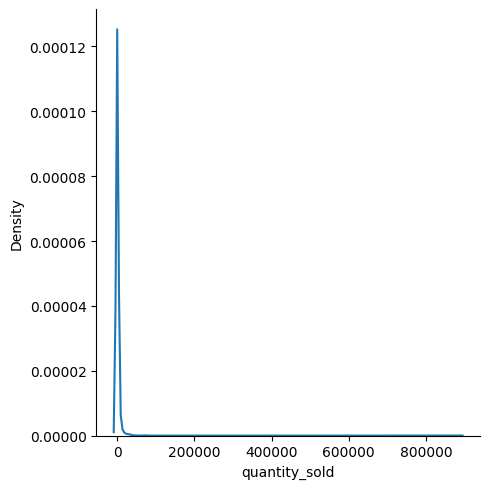

In [40]:
import seaborn as sns

sns.displot(df_sold_0, kind="kde")
plt.show()

In [41]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Sử dụng LabelEncoder để mã hóa cột 'tác giả'
df['authors_encoded'] = label_encoder.fit_transform(df['authors'])
# ex_data = ex_data.drop(columns=['id','authors'])
# In ra DataFrame đã được mã hóa
df.head()

,id,name,price,original_price,discount,discount_rate,rating_average,review_count,thumbnail_url,quantity_sold,categories,description,authors,publisher,publication_date,manufacturer,book_cover,number_of_page,language,authors_encoded
0,74021317,Cây Cam Ngọt Của Tôi,64800,108000,43200,40,5.0,13236,https://salt.tikicdn.com/cache/280x280/ts/prod...,71894,"'', '', 'Sách văn học', 'Tiểu Thuyết'",“Vị chua chát của cái nghèo hòa trộn với vị ng...,José Mauro de Vasconcelos,Nhã Nam,NaN,Nhà Xuất Bản Hội Nhà Văn,Bìa mềm,244,2,844
1,188940817,Vị Thần Của Những Quyết Định,54510,79000,24490,31,4.8,1148,https://salt.tikicdn.com/cache/280x280/ts/prod...,9750,"'', '', 'Sách Kiến Thức Tổng Hợp', 'Sách Chiêm...",Không có gì là ngẫu nhiên. Mọi chuyện đều là t...,Universe,Người Trẻ Việt,2022-07-01 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,320,2,1763
2,189643105,Không Phải Sói Nhưng Cũng Đừng Là Cừu -Tặng kè...,81925,128000,46075,36,4.8,1404,https://salt.tikicdn.com/cache/280x280/ts/prod...,12786,"'', '', 'Sách kỹ năng sống', 'Sách tư duy - Kỹ...",SÓI VÀ CỪU - BẠN KHÔNG TỐT NHƯ BẠN NGHĨ ĐÂU! \...,Lê Bảo Ngọc,Skybooks,2022-07-07 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,296,2,1024
3,26114399,"Nóng Giận Là Bản Năng , Tĩnh Lặng Là Bản Lĩnh",53584,89000,35416,40,4.8,7173,https://salt.tikicdn.com/cache/280x280/ts/prod...,73876,"'', '', 'Sách kỹ năng sống', 'Sách tư duy - Kỹ...",Sai lầm lớn nhất của chúng ta là đem những tật...,Tống Mặc,Skybooks,2019-01-08 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,264,2,1756
4,109017985,"Thiên Tài Bên Trái, Kẻ Điên Bên Phải (Tái Bản)",114560,179000,64440,36,4.8,5406,https://salt.tikicdn.com/cache/280x280/ts/prod...,25657,"'', '', 'Sách văn học', 'Truyện ngắn - Tản văn...","NẾU MỘT NGÀY ANH THẤY TÔI ĐIÊN, THỰC RA CHÍNH ...",Cao Minh,Vibooks,2021-06-01 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,424,2,255


In [42]:
df.shape


(4000, 20)

In [43]:
df.head()

,id,name,price,original_price,discount,discount_rate,rating_average,review_count,thumbnail_url,quantity_sold,categories,description,authors,publisher,publication_date,manufacturer,book_cover,number_of_page,language,authors_encoded
0,74021317,Cây Cam Ngọt Của Tôi,64800,108000,43200,40,5.0,13236,https://salt.tikicdn.com/cache/280x280/ts/prod...,71894,"'', '', 'Sách văn học', 'Tiểu Thuyết'",“Vị chua chát của cái nghèo hòa trộn với vị ng...,José Mauro de Vasconcelos,Nhã Nam,NaN,Nhà Xuất Bản Hội Nhà Văn,Bìa mềm,244,2,844
1,188940817,Vị Thần Của Những Quyết Định,54510,79000,24490,31,4.8,1148,https://salt.tikicdn.com/cache/280x280/ts/prod...,9750,"'', '', 'Sách Kiến Thức Tổng Hợp', 'Sách Chiêm...",Không có gì là ngẫu nhiên. Mọi chuyện đều là t...,Universe,Người Trẻ Việt,2022-07-01 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,320,2,1763
2,189643105,Không Phải Sói Nhưng Cũng Đừng Là Cừu -Tặng kè...,81925,128000,46075,36,4.8,1404,https://salt.tikicdn.com/cache/280x280/ts/prod...,12786,"'', '', 'Sách kỹ năng sống', 'Sách tư duy - Kỹ...",SÓI VÀ CỪU - BẠN KHÔNG TỐT NHƯ BẠN NGHĨ ĐÂU! \...,Lê Bảo Ngọc,Skybooks,2022-07-07 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,296,2,1024
3,26114399,"Nóng Giận Là Bản Năng , Tĩnh Lặng Là Bản Lĩnh",53584,89000,35416,40,4.8,7173,https://salt.tikicdn.com/cache/280x280/ts/prod...,73876,"'', '', 'Sách kỹ năng sống', 'Sách tư duy - Kỹ...",Sai lầm lớn nhất của chúng ta là đem những tật...,Tống Mặc,Skybooks,2019-01-08 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,264,2,1756
4,109017985,"Thiên Tài Bên Trái, Kẻ Điên Bên Phải (Tái Bản)",114560,179000,64440,36,4.8,5406,https://salt.tikicdn.com/cache/280x280/ts/prod...,25657,"'', '', 'Sách văn học', 'Truyện ngắn - Tản văn...","NẾU MỘT NGÀY ANH THẤY TÔI ĐIÊN, THỰC RA CHÍNH ...",Cao Minh,Vibooks,2021-06-01 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,424,2,255


In [44]:
# df_arthur = df['authors'].str.split(',')
# df_arthur = df_arthur.explode('authors')
df_arthur = df['authors'].value_counts()

df_arthur

                      68
Nhiều Tác Giả         41
Cambridge             36
Nhiều tác giả         29
Jeff Kinney           28
                      ..
Hoa Dương              1
Umetane                1
Katsusuke Serizawa     1
Steve Anderson         1
Graham Greene          1
Name: authors, Length: 1913, dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Sử dụng LabelEncoder để mã hóa cột 'tác giả'
df['authors_encoded'] = label_encoder.fit_transform(df['authors'])
# ex_data = ex_data.drop(columns=['id','authors'])
# In ra DataFrame đã được mã hóa
df.head()

,id,name,price,original_price,discount,discount_rate,rating_average,review_count,thumbnail_url,quantity_sold,categories,description,authors,publisher,publication_date,manufacturer,book_cover,number_of_page,language,authors_encoded
0,74021317,Cây Cam Ngọt Của Tôi,64800,108000,43200,40,5.0,13236,https://salt.tikicdn.com/cache/280x280/ts/prod...,71894,"'', '', 'Sách văn học', 'Tiểu Thuyết'",“Vị chua chát của cái nghèo hòa trộn với vị ng...,José Mauro de Vasconcelos,Nhã Nam,NaN,Nhà Xuất Bản Hội Nhà Văn,Bìa mềm,244,2,844
1,188940817,Vị Thần Của Những Quyết Định,54510,79000,24490,31,4.8,1148,https://salt.tikicdn.com/cache/280x280/ts/prod...,9750,"'', '', 'Sách Kiến Thức Tổng Hợp', 'Sách Chiêm...",Không có gì là ngẫu nhiên. Mọi chuyện đều là t...,Universe,Người Trẻ Việt,2022-07-01 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,320,2,1763
2,189643105,Không Phải Sói Nhưng Cũng Đừng Là Cừu -Tặng kè...,81925,128000,46075,36,4.8,1404,https://salt.tikicdn.com/cache/280x280/ts/prod...,12786,"'', '', 'Sách kỹ năng sống', 'Sách tư duy - Kỹ...",SÓI VÀ CỪU - BẠN KHÔNG TỐT NHƯ BẠN NGHĨ ĐÂU! \...,Lê Bảo Ngọc,Skybooks,2022-07-07 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,296,2,1024
3,26114399,"Nóng Giận Là Bản Năng , Tĩnh Lặng Là Bản Lĩnh",53584,89000,35416,40,4.8,7173,https://salt.tikicdn.com/cache/280x280/ts/prod...,73876,"'', '', 'Sách kỹ năng sống', 'Sách tư duy - Kỹ...",Sai lầm lớn nhất của chúng ta là đem những tật...,Tống Mặc,Skybooks,2019-01-08 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,264,2,1756
4,109017985,"Thiên Tài Bên Trái, Kẻ Điên Bên Phải (Tái Bản)",114560,179000,64440,36,4.8,5406,https://salt.tikicdn.com/cache/280x280/ts/prod...,25657,"'', '', 'Sách văn học', 'Truyện ngắn - Tản văn...","NẾU MỘT NGÀY ANH THẤY TÔI ĐIÊN, THỰC RA CHÍNH ...",Cao Minh,Vibooks,2021-06-01 00:00:00,Nhà Xuất Bản Thế Giới,Bìa mềm,424,2,255


In [46]:
df.shape


(4000, 20)

In [47]:
df = df.drop(columns=['id','original_price','discount','discount_rate','thumbnail_url','authors','publisher','publication_date','manufacturer','book_cover'])
df.shape


(4000, 10)

In [48]:
df.head()

,name,price,rating_average,review_count,quantity_sold,categories,description,number_of_page,language,authors_encoded
0,Cây Cam Ngọt Của Tôi,64800,5.0,13236,71894,"'', '', 'Sách văn học', 'Tiểu Thuyết'",“Vị chua chát của cái nghèo hòa trộn với vị ng...,244,2,844
1,Vị Thần Của Những Quyết Định,54510,4.8,1148,9750,"'', '', 'Sách Kiến Thức Tổng Hợp', 'Sách Chiêm...",Không có gì là ngẫu nhiên. Mọi chuyện đều là t...,320,2,1763
2,Không Phải Sói Nhưng Cũng Đừng Là Cừu -Tặng kè...,81925,4.8,1404,12786,"'', '', 'Sách kỹ năng sống', 'Sách tư duy - Kỹ...",SÓI VÀ CỪU - BẠN KHÔNG TỐT NHƯ BẠN NGHĨ ĐÂU! \...,296,2,1024
3,"Nóng Giận Là Bản Năng , Tĩnh Lặng Là Bản Lĩnh",53584,4.8,7173,73876,"'', '', 'Sách kỹ năng sống', 'Sách tư duy - Kỹ...",Sai lầm lớn nhất của chúng ta là đem những tật...,264,2,1756
4,"Thiên Tài Bên Trái, Kẻ Điên Bên Phải (Tái Bản)",114560,4.8,5406,25657,"'', '', 'Sách văn học', 'Truyện ngắn - Tản văn...","NẾU MỘT NGÀY ANH THẤY TÔI ĐIÊN, THỰC RA CHÍNH ...",424,2,255


### Đánh giá

In [49]:
# Tạo cột mới bằng tích của hai cột đã có
df['rate'] = df['rating_average'] * df['review_count']

In [50]:
df_rate = df['rate']
df_rate = df['rate'].value_counts()

df_rate

0.0       661
5.0       307
10.0      173
15.0       95
20.0       80
         ... 
4206.5      1
2130.0      1
1411.2      1
787.2       1
27.2        1
Name: rate, Length: 1144, dtype: int64

In [51]:
df = df.drop(columns=['review_count'])


In [52]:
df.shape


(4000, 10)

In [ ]:
df = df.drop(columns=['id','original_price','discount','discount_rate','thumbnail_url','authors','publisher','publication_date','manufacturer','book_cover'])
df.shape


# Pre-Processing

In [54]:
with open('vietnamese-stopwords.txt', 'r', encoding='utf-8') as file:
    stop_words = file.readlines()
stop_words_vn = [word.strip() for word in stop_words]

In [55]:
stop_words_vn

['a lô',
 'a ha',
 'ai',
 'ai ai',
 'ai nấy',
 'ai đó',
 'alô',
 'amen',
 'anh',
 'anh ấy',
 'ba',
 'ba ba',
 'ba bản',
 'ba cùng',
 'ba họ',
 'ba ngày',
 'ba ngôi',
 'ba tăng',
 'bao giờ',
 'bao lâu',
 'bao nhiêu',
 'bao nả',
 'bay biến',
 'biết',
 'biết bao',
 'biết bao nhiêu',
 'biết chắc',
 'biết chừng nào',
 'biết mình',
 'biết mấy',
 'biết thế',
 'biết trước',
 'biết việc',
 'biết đâu',
 'biết đâu chừng',
 'biết đâu đấy',
 'biết được',
 'buổi',
 'buổi làm',
 'buổi mới',
 'buổi ngày',
 'buổi sớm',
 'bà',
 'bà ấy',
 'bài',
 'bài bác',
 'bài bỏ',
 'bài cái',
 'bác',
 'bán',
 'bán cấp',
 'bán dạ',
 'bán thế',
 'bây bẩy',
 'bây chừ',
 'bây giờ',
 'bây nhiêu',
 'bèn',
 'béng',
 'bên',
 'bên bị',
 'bên có',
 'bên cạnh',
 'bông',
 'bước',
 'bước khỏi',
 'bước tới',
 'bước đi',
 'bạn',
 'bản',
 'bản bộ',
 'bản riêng',
 'bản thân',
 'bản ý',
 'bất chợt',
 'bất cứ',
 'bất giác',
 'bất kì',
 'bất kể',
 'bất kỳ',
 'bất luận',
 'bất ngờ',
 'bất nhược',
 'bất quá',
 'bất quá chỉ',
 'bất thình l

In [56]:
import nltk
nltk.download('stopwords')


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [57]:
import nltk
from nltk.corpus import stopwords

# Tải danh sách stop words cho ngôn ngữ tiếng Anh (hoặc ngôn ngữ khác)
nltk.download('stopwords')

# Lấy danh sách stop words cho tiếng Anh
stop_words_en = set(stopwords.words('english'))


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [58]:

# Chuyển đổi thành danh sách
stop_words_en = list(stop_words_en)
stop_words_en

["you're",
 'to',
 'there',
 'should',
 'couldn',
 'under',
 'few',
 'they',
 'didn',
 'was',
 'll',
 'just',
 "couldn't",
 'are',
 'until',
 'so',
 'shan',
 'such',
 'very',
 'now',
 "mightn't",
 "aren't",
 'it',
 'because',
 'our',
 'how',
 'that',
 'other',
 'i',
 'my',
 'further',
 'yourself',
 'isn',
 'than',
 "didn't",
 'from',
 'any',
 'be',
 'each',
 "shan't",
 'of',
 'on',
 'yourselves',
 'he',
 'no',
 "it's",
 'its',
 "won't",
 'me',
 'd',
 'yours',
 'if',
 'hers',
 'am',
 'some',
 'she',
 'needn',
 'hasn',
 'who',
 'itself',
 'again',
 "hadn't",
 'mustn',
 'the',
 "wouldn't",
 'your',
 'himself',
 't',
 'is',
 's',
 'themselves',
 'being',
 "you'll",
 'what',
 'you',
 'herself',
 'during',
 "mustn't",
 'when',
 'their',
 'do',
 've',
 'in',
 'once',
 'most',
 'wasn',
 'but',
 'shouldn',
 'and',
 'this',
 'as',
 'not',
 'at',
 "isn't",
 'then',
 'theirs',
 'm',
 "she's",
 "you've",
 'more',
 "hasn't",
 'does',
 'can',
 'been',
 'for',
 'an',
 'before',
 'won',
 'myself',
 'ov

In [59]:
stop_words = stop_words_en + stop_words_vn
stop_words

["you're",
 'to',
 'there',
 'should',
 'couldn',
 'under',
 'few',
 'they',
 'didn',
 'was',
 'll',
 'just',
 "couldn't",
 'are',
 'until',
 'so',
 'shan',
 'such',
 'very',
 'now',
 "mightn't",
 "aren't",
 'it',
 'because',
 'our',
 'how',
 'that',
 'other',
 'i',
 'my',
 'further',
 'yourself',
 'isn',
 'than',
 "didn't",
 'from',
 'any',
 'be',
 'each',
 "shan't",
 'of',
 'on',
 'yourselves',
 'he',
 'no',
 "it's",
 'its',
 "won't",
 'me',
 'd',
 'yours',
 'if',
 'hers',
 'am',
 'some',
 'she',
 'needn',
 'hasn',
 'who',
 'itself',
 'again',
 "hadn't",
 'mustn',
 'the',
 "wouldn't",
 'your',
 'himself',
 't',
 'is',
 's',
 'themselves',
 'being',
 "you'll",
 'what',
 'you',
 'herself',
 'during',
 "mustn't",
 'when',
 'their',
 'do',
 've',
 'in',
 'once',
 'most',
 'wasn',
 'but',
 'shouldn',
 'and',
 'this',
 'as',
 'not',
 'at',
 "isn't",
 'then',
 'theirs',
 'm',
 "she's",
 "you've",
 'more',
 "hasn't",
 'does',
 'can',
 'been',
 'for',
 'an',
 'before',
 'won',
 'myself',
 'ov

In [60]:
def preprocessing(text):
    text = str(text)
    text = text.lower()
    text =  re.sub(r'[^\w\s]', ' ', text)
    text = ' '.join(w for w in text.split() if w not in stop_words)
    return text 

In [61]:
!pip install phunspell

In [62]:
import phunspell

pspell = phunspell.Phunspell('vi_VN')
list(pspell.suggest('thang'))

['thảng',
 'tháng',
 'thăng',
 'thằng',
 'thẳng',
 'thắng',
 'thặng',
 'thòng',
 'thanh',
 'hang',
 'tang',
 'than',
 'thoang',
 'nhang',
 'thong',
 'toang']

In [63]:
df['description'].apply(preprocessing)

0       vị chua chát nghèo hòa trộn vị ngào khám phá đ...
1       ngẫu nhiên tất nhiên sách tâm linh giúp giải q...
2       sói cừu làn ranh ngây thơ xấu đôi mỏng manh kế...
3       sai lầm ta đem tật xấu cảm xúc tiêu cực trút x...
4       điên thực điên đấy hỡi oằn sống giới vô vàn lý...
                              ...                        
3995    キングダム 62 kingdom 62 giá sản phẩm tiki bao thuế...
3996    ワンパンマン 26 one punch man 26 加熱する怪人協会幹部との戦いで s級ヒ...
3997    かぐや様は告らせたい 22 天才たちの恋愛頭脳戦 恋愛は告白した方が負けなのである エリート...
3998    quiet american graham greene classic explorati...
3999    integrated skills syllabus clear grammar focus...
Name: description, Length: 4000, dtype: object

In [64]:
ex_data = df

## For description => use TF-IDF

In [ ]:
df.loc[:,'description'] = df['description'].fillna('')
df

,name,price,rating_average,quantity_sold,categories,description,number_of_page,language,authors_encoded,rate
0,Cây Cam Ngọt Của Tôi,64800,5.0,71894,"'', '', 'Sách văn học', 'Tiểu Thuyết'",“Vị chua chát của cái nghèo hòa trộn với vị ng...,244,2,844,66180.0
1,Vị Thần Của Những Quyết Định,54510,4.8,9750,"'', '', 'Sách Kiến Thức Tổng Hợp', 'Sách Chiêm...",Không có gì là ngẫu nhiên. Mọi chuyện đều là t...,320,2,1763,5510.4
2,Không Phải Sói Nhưng Cũng Đừng Là Cừu -Tặng kè...,81925,4.8,12786,"'', '', 'Sách kỹ năng sống', 'Sách tư duy - Kỹ...",SÓI VÀ CỪU - BẠN KHÔNG TỐT NHƯ BẠN NGHĨ ĐÂU! \...,296,2,1024,6739.2
3,"Nóng Giận Là Bản Năng , Tĩnh Lặng Là Bản Lĩnh",53584,4.8,73876,"'', '', 'Sách kỹ năng sống', 'Sách tư duy - Kỹ...",Sai lầm lớn nhất của chúng ta là đem những tật...,264,2,1756,34430.4
4,"Thiên Tài Bên Trái, Kẻ Điên Bên Phải (Tái Bản)",114560,4.8,25657,"'', '', 'Sách văn học', 'Truyện ngắn - Tản văn...","NẾU MỘT NGÀY ANH THẤY TÔI ĐIÊN, THỰC RA CHÍNH ...",424,2,255,25948.8
...,...,...,...,...,...,...,...,...,...,...
3995,キングダム 62 - Kingdom 62,186200,0.0,1,"'', '', 'Fiction - Literature', 'Comics & Grap...",\n\n\n キングダム 62 - Kingdom 62\n \nGiá sản phẩm...,0,1,0,0.0
3996,ワンパンマン 26 - One-Punch Man 26,144400,0.0,1,"'', '', 'Fiction - Literature', 'Comics & Grap...",\n\n\nワンパンマン 26 - One-Punch Man 26\n加熱する怪人協会幹部...,0,1,2,0.0
3997,かぐや様は告らせたい 22 ~天才たちの恋愛頭脳戦~,186200,5.0,1,"'', '', 'Fiction - Literature', 'Comics & Grap...",かぐや様は告らせたい 22 ~天才たちの恋愛頭脳戦~\n「恋愛は告白した方が負けなのである!...,0,1,1909,5.0
3998,The Quiet American,282200,0.0,7,"'', '', 'Fiction - Literature', 'Contemporary'",The Quiet American\nGraham Greene's classic ex...,0,1,588,0.0


In [65]:
original_data = df.drop(columns=['name','categories','description','number_of_page','quantity_sold'])
# name	price	rating_average	quantity_sold	categories	description	number_of_page	language	authors_encoded	rate
original_data.shape

(4000, 5)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3))



In [ ]:
tf_matrix = tf.fit_transform(df['description'])
# laays cột thứ 3 ... iloc
tf_matrix

<4000x132062 sparse matrix of type '<class 'numpy.float64'>'
	with 2268128 stored elements in Compressed Sparse Row format>

In [ ]:
tf_matrix.shape 
# 4000: number of documents in the corpus. document ~ row value ['description']
# 54090: number of unique terms in your corpus. 
# Each column in the TF-IDF matrix represents a unique term.

(4000, 132062)

In [ ]:
tf_matrix


<4000x132062 sparse matrix of type '<class 'numpy.float64'>'
	with 2268128 stored elements in Compressed Sparse Row format>

In [ ]:
type(tf_matrix)

scipy.sparse.csr.csr_matrix

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

# Khởi tạo mô hình TruncatedSVD với số lượng thành phần chính mới là n_components
n_components = 4000  # Số lượng thành phần chính mới bạn muốn giữ lại
svd = TruncatedSVD(n_components=n_components)

# Chuẩn bị dữ liệu nếu cần thiết
# scaler = StandardScaler()
# tf_matrix_scaled = scaler.fit_transform(tf_matrix)  # Áp dụng chuẩn hóa dữ liệu

# Áp dụng TruncatedSVD vào ma trận thưa
tf_matrix_svd = svd.fit_transform(tf_matrix)

# Kích thước mới của ma trận sau khi giảm số chiều
print("Kích thước mới của ma trận sau khi giảm số chiều:", tf_matrix_svd.shape)


Kích thước mới của ma trận sau khi giảm số chiều: (4000, 4000)


In [67]:
tf_file = 'tf_matrix_svd.csv'
tf_matrix_svd = pd.read_csv(tf_file, usecols=lambda column: column != 0)
tf_matrix_svd.shape

(4000, 4000)

In [ ]:
type(df['authors_encoded'].to_frame())

pandas.core.frame.DataFrame

In [89]:
type(tf_matrix_svd)
# Chuyển DataFrame thành mảng NumPy

# Chuyển mảng NumPy thành danh sách
tf_matrix_svd_list = tf_matrix_svd.values.tolist()

In [ ]:
from scipy.sparse import csr_matrix
from scipy.sparse import hstack


# Chuyển đổi dữ liệu gốc thành định dạng ma trận thưa
additional_data_sparse = csr_matrix(df['authors_encoded'].to_frame())

# Tiếp tục thực hiện phép nối với ma trận thưa hiện có
combined_sparse_matrix = hstack([tf_matrix, additional_data_sparse])



In [ ]:
data = np.concatenate((tf_matrix_svd, original_data), axis=1)
data


array([[ 2.41428248e-01,  2.29623983e-01,  3.23225935e-02, ...,
         2.00000000e+00,  8.44000000e+02,  6.61800000e+04],
       [ 2.44646667e-01,  1.52512256e-01, -7.73006558e-03, ...,
         2.00000000e+00,  1.76300000e+03,  5.51040000e+03],
       [ 2.11196220e-01,  2.35613166e-01,  3.56396678e-02, ...,
         2.00000000e+00,  1.02400000e+03,  6.73920000e+03],
       ...,
       [ 6.60717533e-01, -2.65352703e-01, -2.78671241e-01, ...,
         1.00000000e+00,  1.90900000e+03,  5.00000000e+00],
       [ 1.82143952e-01, -1.43301646e-01,  2.48531318e-01, ...,
         1.00000000e+00,  5.88000000e+02,  0.00000000e+00],
       [ 3.40914932e-01, -1.80664471e-01,  1.16503632e-02, ...,
         1.00000000e+00,  1.91300000e+03,  4.00000000e+00]])

In [ ]:
data.shape


(4000, 4005)

In [ ]:
# # Lưu DataFrame vào một tệp CSV
# tf_svd = pd.DataFrame(tf_matrix_svd)

# tf_svd.to_csv('tf_matrix_svd.csv', index=False)


In [90]:
from sklearn.cluster import KMeans

# Khởi tạo mô hình KMeans với số lượng cụm mong muốn
num_clusters = 500
kmeans = KMeans(n_clusters=num_clusters)

# Sử dụng mô hình để gom nhóm dữ liệu
kmeans.fit(tf_matrix_svd_list)

# Dự đoán nhãn của các cụm cho mỗi mẫu dữ liệu
cluster_labels = kmeans.labels_

# Trả về trung tâm của các cụm
cluster_centers = kmeans.cluster_centers_


In [71]:
cluster_centers.shape

(500, 4000)

In [91]:
def recommend_books(input_book_index):
    # Dự đoán nhãn của sách đầu vào
    input_book_label = kmeans.predict(tf_matrix_svd[input_book_index].reshape(1, -1))[0]
    print('input_book_label',input_book_label)

    # Tìm các sách trong cùng một cụm
    cluster_books_indices = np.where(cluster_labels == input_book_label)[0]
    print('cluster_books_indices',cluster_books_indices,'.....')
    # Lọc ra các sách khác với sách đầu vào
    similar_books_indices = cluster_books_indices[cluster_books_indices != input_book_index]

    for index in similar_books_indices:
        print(f"sách tương đồng với sách đầu vào: {index}:", df.loc[index, :]['name'])

    # # Trả về chỉ số của các sách tương đồng
    # return similar_books_indices

In [73]:
idx = df[df['name'] == 'Đàn Ông Sao Hỏa Đàn Bà Sao Kim'].index[0]
# input = data[idx]
idx


48

In [ ]:
similar_books_indices = recommend_books(idx)


In [76]:
from sklearn.metrics.pairwise import cosine_similarity

# X là ma trận dữ liệu đã được số hóa, có kích thước (4000, 4006)
# cosine_similarity sẽ tính toán tương đồng cosine giữa các hàng của ma trận X
# Kết quả sẽ là một ma trận tương đồng có kích thước (4000, 4000), trong đó mỗi phần tử là độ tương đồng cosine giữa hai hàng tương ứng trong ma trận X
cosine_sim = cosine_similarity(tf_matrix_svd)
cosine_sim
# Độ tương đồng cosine giữa hai hàng i và j trong ma trận X được lưu tại cosine_sim[i, j]
# Trong trường hợp này, cosine_sim[i, j] là độ tương đồng cosine giữa hai mục (sách) i và j


array([[1.        , 0.07809858, 0.09360903, ..., 0.09849425, 0.01751727,
        0.04061996],
       [0.07809858, 1.        , 0.10548865, ..., 0.12295132, 0.02120143,
        0.05591833],
       [0.09360903, 0.10548865, 1.        , ..., 0.06988762, 0.0127862 ,
        0.03141468],
       ...,
       [0.09849425, 0.12295132, 0.06988762, ..., 1.        , 0.09101148,
        0.26700204],
       [0.01751727, 0.02120143, 0.0127862 , ..., 0.09101148, 1.        ,
        0.08330387],
       [0.04061996, 0.05591833, 0.03141468, ..., 0.26700204, 0.08330387,
        1.        ]])

In [77]:
def give_re_cosine(title, sig=cosine_sim):
    idx = df[df['name'] == title].index[0]
    
    sig_scores = list(enumerate(sig[idx]))

    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    sig_scores = sig_scores[1:12] # get top 10 recommendable books
     
    results = []
    
    for (index, score) in sig_scores:
        results.append({
            'index': index,
            'score': score,
            'name': df['name'].iloc[index]
        })
    
    return results

In [78]:
results = give_re_cosine(title='Đàn Ông Sao Hỏa Đàn Bà Sao Kim')
results

[{'index': 1239,
  'score': 0.9994972064092028,
  'name': 'Đàn Ông Sao Hỏa Đàn Bà Sao Kim (Tặng Bookmark PL)'},
 {'index': 935,
  'score': 0.31918385957119044,
  'name': 'Combo 2 Cuốn: Osho Đàn Ông + Osho Phụ Nữ'},
 {'index': 33,
  'score': 0.2675518463610165,
  'name': 'Đắc Nhân Tâm (Bìa Mềm)(Tái Bản)'},
 {'index': 374,
  'score': 0.25082998593714956,
  'name': 'Ho’Oponopono: Sống Như Người Hawaii – Chấp Nhận, Biết Ơn Và Tha Thứ'},
 {'index': 150,
  'score': 0.23997352487126988,
  'name': 'Cư Xử Như Đàn Bà Suy Nghĩ Như Đàn Ông'},
 {'index': 1755,
  'score': 0.23936331721302428,
  'name': 'Vượt Qua Chuyện Sao Hỏa - Sao Kim'},
 {'index': 1305,
  'score': 0.23872376150936778,
  'name': 'Góc Khuất Đàn Bà - Bản Thông Thường'},
 {'index': 1507,
  'score': 0.23336257778001604,
  'name': 'Osho Đàn Ông - The Book Of Men'},
 {'index': 521, 'score': 0.22316077428467074, 'name': 'Osho - Ươm Mầm'},
 {'index': 196,
  'score': 0.2216040718605295,
  'name': 'Men\xa0Chase\xa0Women\xa0Choose - Chuyện T

In [80]:
from sklearn.metrics.pairwise import euclidean_distances

# data là ma trận có kích thước (4000, 4006)
# Tính toán ma trận khoảng cách Euclidean giữa các hàng trong ma trận data
euclidean_dist_matrix = euclidean_distances(tf_matrix_svd)
euclidean_dist_matrix
# Kết quả sẽ là ma trận khoảng cách Euclidean giữa tất cả các cặp hàng trong data
# Mỗi phần tử (i, j) trong ma trận này chứa khoảng cách Euclidean giữa hàng i và hàng j trong data


array([[0.        , 1.35786702, 1.34639591, ..., 1.34276264, 1.40177226,
        1.38519316],
       [1.35786702, 0.        , 1.33754354, ..., 1.32442341, 1.39914157,
        1.37410456],
       [1.34639591, 1.33754354, 0.        , ..., 1.36390057, 1.40514327,
        1.39182277],
       ...,
       [1.34276264, 1.32442341, 1.36390057, ..., 0.        , 1.34832379,
        1.21078319],
       [1.40177226, 1.39914157, 1.40514327, ..., 1.34832379, 0.        ,
        1.35402816],
       [1.38519316, 1.37410456, 1.39182277, ..., 1.21078319, 1.35402816,
        0.        ]])

In [81]:
def give_re_euclid(title, sig=euclidean_dist_matrix):
    idx = df[df['name'] == title].index[0]
    
    sig_scores = list(enumerate(sig[idx]))

    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=False)

    sig_scores = sig_scores[1:12] # get top 10 recommendable books
     
    results = []
    
    for (index, score) in sig_scores:
        results.append({
            'index': index,
            'score': score,
            'name': df['name'].iloc[index]
        })
    
    return results

In [82]:
results = give_re_euclid(title='Đàn Ông Sao Hỏa Đàn Bà Sao Kim')
results

[{'index': 1239,
  'score': 0.03171099464845912,
  'name': 'Đàn Ông Sao Hỏa Đàn Bà Sao Kim (Tặng Bookmark PL)'},
 {'index': 935,
  'score': 1.1668900037525447,
  'name': 'Combo 2 Cuốn: Osho Đàn Ông + Osho Phụ Nữ'},
 {'index': 33,
  'score': 1.2103290078643734,
  'name': 'Đắc Nhân Tâm (Bìa Mềm)(Tái Bản)'},
 {'index': 374,
  'score': 1.224067003119393,
  'name': 'Ho’Oponopono: Sống Như Người Hawaii – Chấp Nhận, Biết Ơn Và Tha Thứ'},
 {'index': 150,
  'score': 1.2329042745718148,
  'name': 'Cư Xử Như Đàn Bà Suy Nghĩ Như Đàn Ông'},
 {'index': 1755,
  'score': 1.2333991104155788,
  'name': 'Vượt Qua Chuyện Sao Hỏa - Sao Kim'},
 {'index': 1305,
  'score': 1.233917532487993,
  'name': 'Góc Khuất Đàn Bà - Bản Thông Thường'},
 {'index': 1507,
  'score': 1.2382547574873115,
  'name': 'Osho Đàn Ông - The Book Of Men'},
 {'index': 521, 'score': 1.246466386001102, 'name': 'Osho - Ươm Mầm'},
 {'index': 196,
  'score': 1.2477146533879184,
  'name': 'Men\xa0Chase\xa0Women\xa0Choose - Chuyện Tình Yêu B

In [83]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tf_matrix_svd)
sig

array([[0.76169913, 0.76160236, 0.76160398, ..., 0.7616045 , 0.761596  ,
        0.76159842],
       [0.76160236, 0.76169913, 0.76160523, ..., 0.76160706, 0.76159638,
        0.76160003],
       [0.76160398, 0.76160523, 0.76169913, ..., 0.76160149, 0.7615955 ,
        0.76159745],
       ...,
       [0.7616045 , 0.76160706, 0.76160149, ..., 0.76169913, 0.76160371,
        0.76162219],
       [0.761596  , 0.76159638, 0.7615955 , ..., 0.76160371, 0.76169913,
        0.7616029 ],
       [0.76159842, 0.76160003, 0.76159745, ..., 0.76162219, 0.7616029 ,
        0.76169913]])

In [84]:
df_sigmoid = pd.DataFrame(data=sig)
df_sigmoid

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
0,0.761699,0.761602,0.761604,0.761603,0.761605,0.761605,0.761602,0.761606,0.761606,0.761608,...,0.761597,0.761602,0.761597,0.761598,0.761602,0.761605,0.761602,0.761604,0.761596,0.761598
1,0.761602,0.761699,0.761605,0.761602,0.761601,0.761600,0.761601,0.761603,0.761603,0.761607,...,0.761597,0.761605,0.761597,0.761600,0.761605,0.761609,0.761605,0.761607,0.761596,0.761600
2,0.761604,0.761605,0.761699,0.761603,0.761606,0.761601,0.761606,0.761604,0.761603,0.761612,...,0.761596,0.761600,0.761596,0.761597,0.761600,0.761603,0.761601,0.761601,0.761595,0.761597
3,0.761603,0.761602,0.761603,0.761699,0.761601,0.761600,0.761603,0.761604,0.761602,0.761606,...,0.761596,0.761600,0.761596,0.761597,0.761600,0.761602,0.761601,0.761601,0.761595,0.761597
4,0.761605,0.761601,0.761606,0.761601,0.761699,0.761602,0.761602,0.761603,0.761602,0.761609,...,0.761596,0.761600,0.761596,0.761597,0.761600,0.761603,0.761601,0.761602,0.761596,0.761598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.761605,0.761609,0.761603,0.761602,0.761603,0.761604,0.761605,0.761606,0.761609,0.761604,...,0.761610,0.761654,0.761610,0.761624,0.761654,0.761699,0.761658,0.761667,0.761605,0.761627
3996,0.761602,0.761605,0.761601,0.761601,0.761601,0.761601,0.761603,0.761603,0.761606,0.761602,...,0.761609,0.761639,0.761606,0.761616,0.761639,0.761658,0.761699,0.761648,0.761603,0.761619
3997,0.761604,0.761607,0.761601,0.761601,0.761602,0.761602,0.761604,0.761604,0.761607,0.761602,...,0.761608,0.761646,0.761607,0.761619,0.761645,0.761667,0.761648,0.761699,0.761604,0.761622
3998,0.761596,0.761596,0.761595,0.761595,0.761596,0.761596,0.761596,0.761596,0.761596,0.761596,...,0.761605,0.761605,0.761603,0.761603,0.761602,0.761605,0.761603,0.761604,0.761699,0.761603


In [85]:
def give_rec(title, sig=sig):
    idx = df[df['name'] == title].index[0]
    
    sig_scores = list(enumerate(sig[idx]))

    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    sig_scores = sig_scores[1:12] # get top 10 recommendable books
     
    results = []
    
    for (index, score) in sig_scores:
        results.append({
            'index': index,
            'score': score,
            'name': df['name'].iloc[index]
        })
    
    return results

In [ ]:
df

,name,price,rating_average,quantity_sold,categories,description,number_of_page,language,authors_encoded,rate
0,Cây Cam Ngọt Của Tôi,64800,5.0,71894,"'', '', 'Sách văn học', 'Tiểu Thuyết'",“Vị chua chát của cái nghèo hòa trộn với vị ng...,244,2,844,66180.0
1,Vị Thần Của Những Quyết Định,54510,4.8,9750,"'', '', 'Sách Kiến Thức Tổng Hợp', 'Sách Chiêm...",Không có gì là ngẫu nhiên. Mọi chuyện đều là t...,320,2,1763,5510.4
2,Không Phải Sói Nhưng Cũng Đừng Là Cừu -Tặng kè...,81925,4.8,12786,"'', '', 'Sách kỹ năng sống', 'Sách tư duy - Kỹ...",SÓI VÀ CỪU - BẠN KHÔNG TỐT NHƯ BẠN NGHĨ ĐÂU! \...,296,2,1024,6739.2
3,"Nóng Giận Là Bản Năng , Tĩnh Lặng Là Bản Lĩnh",53584,4.8,73876,"'', '', 'Sách kỹ năng sống', 'Sách tư duy - Kỹ...",Sai lầm lớn nhất của chúng ta là đem những tật...,264,2,1756,34430.4
4,"Thiên Tài Bên Trái, Kẻ Điên Bên Phải (Tái Bản)",114560,4.8,25657,"'', '', 'Sách văn học', 'Truyện ngắn - Tản văn...","NẾU MỘT NGÀY ANH THẤY TÔI ĐIÊN, THỰC RA CHÍNH ...",424,2,255,25948.8
...,...,...,...,...,...,...,...,...,...,...
3995,キングダム 62 - Kingdom 62,186200,0.0,1,"'', '', 'Fiction - Literature', 'Comics & Grap...",\n\n\n キングダム 62 - Kingdom 62\n \nGiá sản phẩm...,0,1,0,0.0
3996,ワンパンマン 26 - One-Punch Man 26,144400,0.0,1,"'', '', 'Fiction - Literature', 'Comics & Grap...",\n\n\nワンパンマン 26 - One-Punch Man 26\n加熱する怪人協会幹部...,0,1,2,0.0
3997,かぐや様は告らせたい 22 ~天才たちの恋愛頭脳戦~,186200,5.0,1,"'', '', 'Fiction - Literature', 'Comics & Grap...",かぐや様は告らせたい 22 ~天才たちの恋愛頭脳戦~\n「恋愛は告白した方が負けなのである!...,0,1,1909,5.0
3998,The Quiet American,282200,0.0,7,"'', '', 'Fiction - Literature', 'Contemporary'",The Quiet American\nGraham Greene's classic ex...,0,1,588,0.0


In [86]:
results = give_rec(title='Đàn Ông Sao Hỏa Đàn Bà Sao Kim')
results

[{'index': 1239,
  'score': 0.7616990767821551,
  'name': 'Đàn Ông Sao Hỏa Đàn Bà Sao Kim (Tặng Bookmark PL)'},
 {'index': 935,
  'score': 0.7616276661770252,
  'name': 'Combo 2 Cuốn: Osho Đàn Ông + Osho Phụ Nữ'},
 {'index': 33,
  'score': 0.7616222457524179,
  'name': 'Đắc Nhân Tâm (Bìa Mềm)(Tái Bản)'},
 {'index': 374,
  'score': 0.7616204902376169,
  'name': 'Ho’Oponopono: Sống Như Người Hawaii – Chấp Nhận, Biết Ơn Và Tha Thứ'},
 {'index': 150,
  'score': 0.7616193504853593,
  'name': 'Cư Xử Như Đàn Bà Suy Nghĩ Như Đàn Ông'},
 {'index': 1755,
  'score': 0.7616192864233166,
  'name': 'Vượt Qua Chuyện Sao Hỏa - Sao Kim'},
 {'index': 1305,
  'score': 0.7616192192801824,
  'name': 'Góc Khuất Đàn Bà - Bản Thông Thường'},
 {'index': 1507,
  'score': 0.7616186564408742,
  'name': 'Osho Đàn Ông - The Book Of Men'},
 {'index': 521, 'score': 0.7616175854100486, 'name': 'Osho - Ươm Mầm'},
 {'index': 196,
  'score': 0.7616174219801203,
  'name': 'Men\xa0Chase\xa0Women\xa0Choose - Chuyện Tình Yêu

In [ ]:
print(json.dumps(results, indent=4))

[
    {
        "index": 594,
        "score": 0.7615983246336389,
        "name": "N\u00f3ng Gi\u1eadn L\u00e0 B\u1ea3n N\u0103ng, T\u0129nh L\u1eb7ng L\u00e0 B\u1ea3n L\u0129nh (T\u00e1i B\u1ea3n 2020)"
    },
    {
        "index": 1291,
        "score": 0.7615973521008945,
        "name": "Combo S\u00e1ch T\u01b0 Duy - K\u1ef9 N\u0103ng S\u1ed1ng Ai C\u0169ng C\u1ea7n Ph\u1ea3i C\u00f3 : C\u00e2n B\u1eb1ng C\u1ea3m X\u00fac, C\u1ea3 L\u00fac B\u00e3o Gi\u00f4ng + N\u00f3ng Gi\u1eadn L\u00e0 B\u1ea3n N\u0103ng , T\u0129nh L\u1eb7ng L\u00e0 B\u1ea3n L\u0129nh ( T\u1eb7ng K\u00e8m Bookmark Green Life)"
    },
    {
        "index": 33,
        "score": 0.7615947146274734,
        "name": "\u0110\u1eafc Nh\u00e2n T\u00e2m (B\u00eca M\u1ec1m)(T\u00e1i B\u1ea3n)"
    },
    {
        "index": 374,
        "score": 0.7615946951036093,
        "name": "Ho\u2019Oponopono: S\u1ed1ng Nh\u01b0 Ng\u01b0\u1eddi Hawaii \u2013 Ch\u1ea5p Nh\u1eadn, Bi\u1ebft \u01a0n V\u00e0 Tha Th\u1ee9"
    },
   